In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
datagen = ImageDataGenerator(rescale=1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            rotation_range=45,
                            validation_split=0.2)
trainData = datagen.flow_from_directory(directory='lung_train',
                                        batch_size=32,
                                        shuffle=False,
                                        target_size=(150,150),
                                        class_mode='categorical',
                                        subset='training',
                                        color_mode='rgb')
valData = datagen.flow_from_directory(directory='lung_test',
                                        batch_size=32,
                                        shuffle=False,
                                        target_size=(150,150),
                                        class_mode='categorical',
                                        subset='validation',
                                        color_mode='rgb')

Found 10800 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [3]:
# Custom CNN-Model
model = Sequential()

# Input Layer
model.add(Input((150,150,3)))

# Block-1 of Custom CNN
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D())

# Block-2 of Custom CNN
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D())

# Block-3 of Custom CNN
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D())

# Block-4 of Custom CNN
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten(name="flatten"))

model.add(Dense(128, activation="relu", name="fc1"))
model.add(Dense(64, activation="relu", name="fc2"))

model.add(Dense(3, activation="softmax", name="output"))
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        36928     
                                                        

In [4]:
checkpoint = ModelCheckpoint(filepath='lungCancer_custom4-1.hdf5', monitor='val_accuracy', save_best_only=True)
history = model.fit_generator(generator=trainData, epochs=20, verbose=1, validation_data=valData, callbacks=[checkpoint])

C:\Users\raami\AppData\Local\Temp\ipykernel_18028\1966088731.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=trainData, epochs=20, verbose=1, validation_data=valData, callbacks=[checkpoint])


Epoch 1/20
338/338 [==============================] - 91s 249ms/step - loss: 1.9435 - accuracy: 0.3605 - val_loss: 0.7258 - val_accuracy: 0.6333
Epoch 2/20
338/338 [==============================] - 77s 226ms/step - loss: 0.6950 - accuracy: 0.6874 - val_loss: 0.3970 - val_accuracy: 0.8733
Epoch 3/20
338/338 [==============================] - 75s 221ms/step - loss: 0.4853 - accuracy: 0.7948 - val_loss: 0.4051 - val_accuracy: 0.8000
Epoch 4/20
338/338 [==============================] - 76s 224ms/step - loss: 0.4631 - accuracy: 0.8207 - val_loss: 0.6743 - val_accuracy: 0.7400
Epoch 5/20
338/338 [==============================] - 76s 225ms/step - loss: 0.3709 - accuracy: 0.8526 - val_loss: 0.3649 - val_accuracy: 0.8200
Epoch 6/20
338/338 [==============================] - 79s 232ms/step - loss: 0.3276 - accuracy: 0.8617 - val_loss: 0.3441 - val_accuracy: 0.8933
Epoch 7/20
338/338 [==============================] - 78s 229ms/step - loss: 0.3049 - accuracy: 0.8821 - val_loss: 0.2639 - val_ac

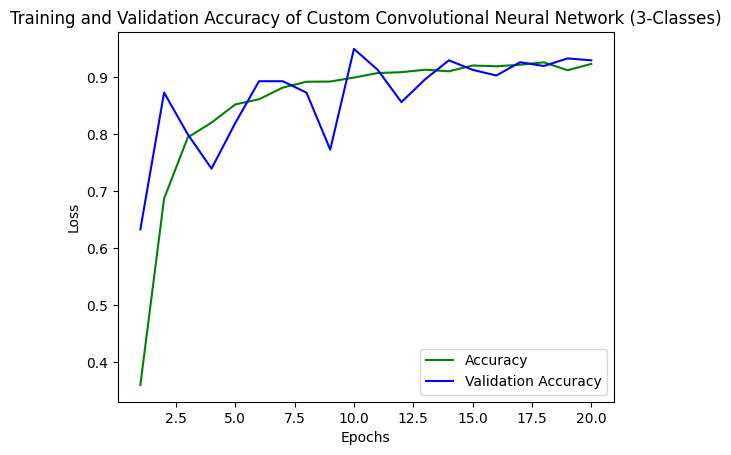

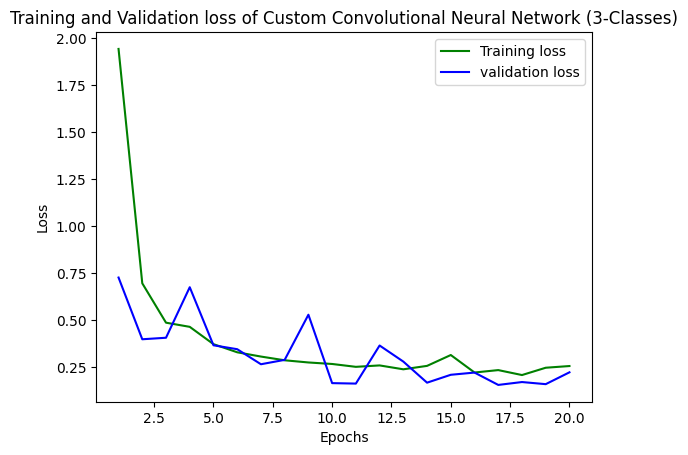

In [5]:
# Training and Validation Accuracy Graph of Custom Convolutional Neural Network (3-Classes)
train = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, train, 'g', label='Accuracy')
plt.plot(epochs, val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of Custom Convolutional Neural Network (3-Classes)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training and Validation Loss Graph of Custom Convolutional Neural Network (3-Classes)
train = history.history['loss']
val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, train, 'g', label='Training loss')
plt.plot(epochs, val, 'b', label='validation loss')
plt.title('Training and Validation loss of Custom Convolutional Neural Network (3-Classes)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()